In [1]:
import numpy as np
from scipy import linalg as LA
import math
import matplotlib.pyplot as plt

## Rotation matrices

A rotation of 2D space can be written as matrix multiplication. A rotation by an angle of $\theta$ can be represented by the following matrix:

$$R = \begin{pmatrix} \cos(\theta) & -\sin(\theta)\\ \sin(\theta) & \cos(\theta) \end{pmatrix}$$

Rotation of the vector $v \in \mathbb{R}^2$ by an angle of $\theta$ is given by $Rv$. Notice two facts about this matrix:

1. The columns have length 1 (remember: $\cos(\theta)^2 + \sin(\theta)^2 = 1$).
2. The columns are orthogonal to each other (dot product between them is zero).

A matrix that satisfies these two properties is called an **orthogonal matrix**. Higher-dimensional rotations are also orthogonal matrices. An orthogonal matrix may flip (or mirror) space in addition to rotating it. For example, multiplication by this matrix will mirror a vector about the $y$-axis:
$$M = \begin{pmatrix} -1 & 0 \\ 0 & 1 \end{pmatrix}$$

Here's an example of a 2D rotation matrix:

In [2]:
# Define a rotation by angle theta = 60 degrees
theta = math.pi / 3
R = np.array([[math.cos(theta), -math.sin(theta)],
               [math.sin(theta), math.cos(theta)]])
print(R)

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]


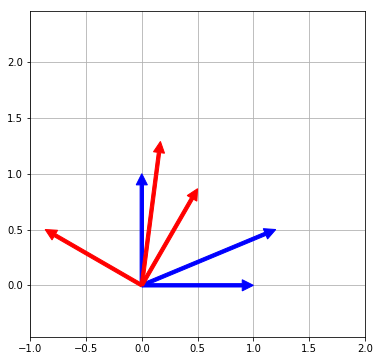

In [3]:
# Helper function to draw a vector as an arrow
def drawVec(v, col):
    plt.arrow(0, 0, v[0], v[1],
              width=0.03, length_includes_head=True,
              head_width=0.1, head_length=0.1,
              color=col)

# Define three vectors
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([1.2, 0.5])

# Bunch of stuff to set up the plot
fig, ax = plt.subplots(figsize=(6,6))
plt.axis("equal")
ax.set_axisbelow(True)
plt.grid(True)
plt.xlim(-1, 2)
plt.ylim(-0.5, 2.5)

# Draw the three vectors
drawVec(v1, "Blue")
drawVec(v2, "Blue")
drawVec(v3, "Blue")

# Draw rotated vectors
drawVec(R.dot(v1), "Red")
drawVec(R.dot(v2), "Red")
drawVec(R.dot(v3), "Red")

plt.show()

The inverse of a rotation matrix is simply its transpose. That is,

$$R R^T = R^T R = I.$$

In [4]:
print("R R^T =\n", R.dot(R.T), "\n")
print("R^T R =\n", (R.T).dot(R))

R R^T =
 [[  1.00000000e+00   1.48741681e-17]
 [  1.48741681e-17   1.00000000e+00]] 

R^T R =
 [[  1.00000000e+00  -1.48741681e-17]
 [ -1.48741681e-17   1.00000000e+00]]


## Singular Value Decomposition

As we discussed in class, singular value decomposition (SVD) decomposes a matrix $A$ as

$$A = USV^T,$$

where $U$ and $V$ are orthogonal, and $S$ is diagonal with nonnegative entries.

Here is an example of decomposing a 2x2 matrix into a series of 2D transformations.

In [5]:
A = np.array([[1.5, 1.6], [-1.8, 0.25]])
print("A =\n", A, "\n")

U, s, Vt = LA.svd(A)

S = LA.diagsvd(s, 2, 2)

print("SVD\n===\n")
print("U =\n", U, "\n")
print("S =\n", S, "\n")
print("V^T =\n", Vt, "\n")
print("U S V^T =\n", U.dot(S.dot(Vt)), "\n")

A =
 [[ 1.5   1.6 ]
 [-1.8   0.25]] 

SVD
===

U =
 [[-0.80975944  0.586762  ]
 [ 0.586762    0.80975944]] 

S =
 [[ 2.54491833  0.        ]
 [ 0.          1.27901944]] 

V^T =
 [[-0.8922922  -0.45145834]
 [-0.45145834  0.8922922 ]] 

U S V^T =
 [[ 1.5   1.6 ]
 [-1.8   0.25]] 



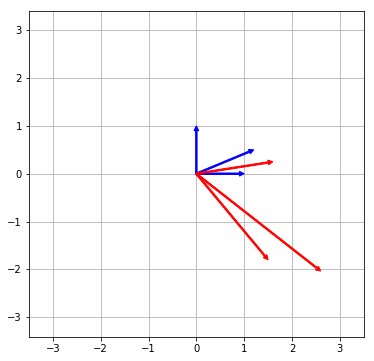

In [6]:
# Bunch of stuff to set up the plot
fig, ax = plt.subplots(figsize=(6,6))
plt.axis("equal")
ax.set_axisbelow(True)
plt.grid(True)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Draw the three vectors
drawVec(v1, "Blue")
drawVec(v2, "Blue")
drawVec(v3, "Blue")

# Draw rotated vectors
drawVec(A.dot(v1), "Red")
drawVec(A.dot(v2), "Red")
drawVec(A.dot(v3), "Red")

plt.show()

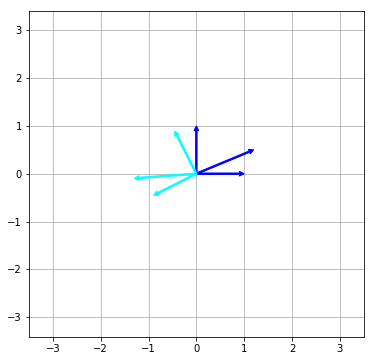

In [7]:
# Bunch of stuff to set up the plot
fig, ax = plt.subplots(figsize=(6,6))
plt.axis("equal")
ax.set_axisbelow(True)
plt.grid(True)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Draw the three vectors
drawVec(v1, "Blue")
drawVec(v2, "Blue")
drawVec(v3, "Blue")

# Draw rotated vectors
drawVec(Vt.dot(v1), "Cyan")
drawVec(Vt.dot(v2), "Cyan")
drawVec(Vt.dot(v3), "Cyan")

plt.show()

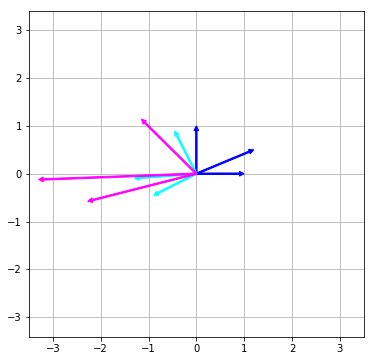

In [8]:
# Bunch of stuff to set up the plot
fig, ax = plt.subplots(figsize=(6,6))
plt.axis("equal")
ax.set_axisbelow(True)
plt.grid(True)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Draw the three vectors
drawVec(v1, "Blue")
drawVec(v2, "Blue")
drawVec(v3, "Blue")

# Draw rotated vectors
drawVec(Vt.dot(v1), "Cyan")
drawVec(Vt.dot(v2), "Cyan")
drawVec(Vt.dot(v3), "Cyan")

# Draw rotated and scaled vectors
drawVec(S.dot(Vt.dot(v1)), "Magenta")
drawVec(S.dot(Vt.dot(v2)), "Magenta")
drawVec(S.dot(Vt.dot(v3)), "Magenta")

plt.show()

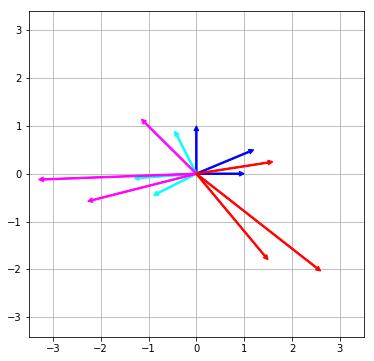

In [9]:
# Bunch of stuff to set up the plot
fig, ax = plt.subplots(figsize=(6,6))
plt.axis("equal")
ax.set_axisbelow(True)
plt.grid(True)
plt.xlim(-3.5, 3.5)
plt.ylim(-3.5, 3.5)

# Draw the three vectors
drawVec(v1, "Blue")
drawVec(v2, "Blue")
drawVec(v3, "Blue")

# Draw rotated vectors
drawVec(Vt.dot(v1), "Cyan")
drawVec(Vt.dot(v2), "Cyan")
drawVec(Vt.dot(v3), "Cyan")

# Draw rotated and scaled vectors
drawVec(S.dot(Vt.dot(v1)), "Magenta")
drawVec(S.dot(Vt.dot(v2)), "Magenta")
drawVec(S.dot(Vt.dot(v3)), "Magenta")

# Draw rotated, scaled, and rotated vectors
drawVec(U.dot(S.dot(Vt.dot(v1))), "Red")
drawVec(U.dot(S.dot(Vt.dot(v2))), "Red")
drawVec(U.dot(S.dot(Vt.dot(v3))), "Red")

plt.show()